In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

In [2]:
data = np.load('./feature_vector_v1.npy')

In [3]:
data.shape

(11076, 22)

In [4]:
# data = MinMaxScaler().fit_transform(data)
data = StandardScaler().fit_transform(data)

In [5]:
data[:, 0]

array([ 2.84454414,  2.71904972,  3.00350375, ..., -0.45177616,
       -0.36811321, -0.32628174])

In [6]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

In [7]:
data_tsne.shape

(11076, 2)

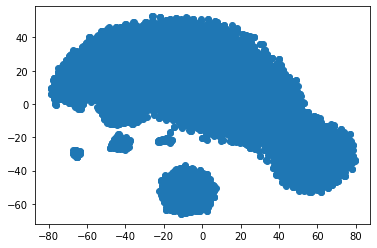

In [8]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [9]:
model = DBSCAN(eps=0.3, min_samples=30).fit(data)
labels_1 = model.labels_

11076
[[ 2.84454414  2.39001032  2.69278114 ...  2.97096765  2.9453596
  -1.10717935]
 [ 2.71904972  2.48730755  3.57079474 ...  2.797833    2.75299697
  -1.06176195]
 [ 3.00350375  2.48730755  3.18056647 ...  3.13544556  3.09590426
  -0.92955655]
 ...
 [-0.45177616 -0.43160931 -0.33148792 ... -0.43112808 -0.29135068
   1.39741684]
 [-0.36811321 -0.23701485 -0.23393085 ... -0.37053096 -0.3833502
   0.49430354]
 [-0.32628174 -0.23701485 -0.52660205 ... -0.34456076 -0.35825942
  -0.6476978 ]]


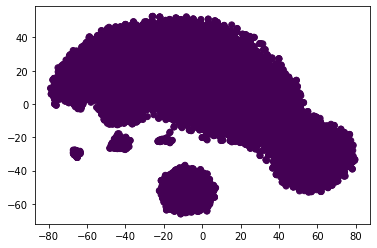

In [10]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_1)
outliers_1 = data[labels_1 == -1]
print(len(outliers_1))
print(outliers_1)

In [11]:
model = IsolationForest(max_samples=100).fit(data)
labels_2 = model.predict(data)

1384


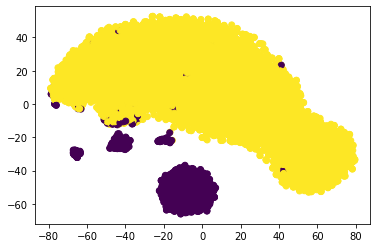

In [12]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_2)
outliers_2 = data[labels_2 == -1]
print(len(outliers_2))